<a href="https://colab.research.google.com/github/munhof/calculo-numerico/blob/main/prueba_opsicion_DM_Exactas_uba_materias_con_hta_computacionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1
# Normas matriciales.
Se quiere estimar la norma 2 de una matriz $A \in \mathbb{R}^{3x3}$ como el máximo del valor $\frac{∥Ax∥_2}{∥x∥_2}$ entre varios vectores $x\in\mathbb{R}^3$ no nulos generadosal azar. Hacer un programa que reciba una matriz A y luego:

* genere los primeros 100 términos de la siguiente sucesión:
\begin{equation}
s1 = 0, sk+1 = max \{sk, \frac{∥Ax_k∥_2}{∥x_k∥_2}\}
\end{equation}
donde los $x_k\in\mathbb{R}^3$ son vectores no nulos generados al azar en la bola unitaria:
$B = {x : ∥x∥_2 ≤ 1}$.

* Grafique la sucesión calculada, junto con el valor exacto de la norma de la matriz.

Recordar que la norma 2 de un vector v puede calcularse con el comando `np.linalg.norm(v)`, mientras que la norma 2 de una matriz A se puede obtener con `np.linalg.norm(A,2)`. Tener en cuenta que los vectores generados al azar (comando `np.random.random`) tienen coordenadas en el intervalo [0, 1] y por lo tanto abarcan sólo el primer octante en $\mathbb{R}^3$

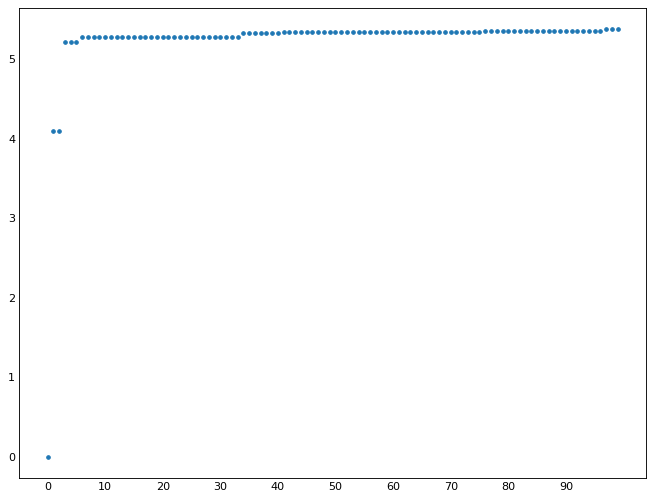

In [ ]:
"""
Lo primero es importar las librerias que necesitaremos
numnpy para el trabajo matematico
matplotlib.pyplot para los graficos
"""

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('_mpl-gallery')

#lo primero es armar la matriz A, para ello configuramos sus filas de largo 3
fila1: list[int] = [1,2,3]
fila2: list[int] = [1,1,3]
fila3: list[int] = [1,2,1]

#y armamos la matriz utilizando np.array()

matriz: list[list[int]] = np.array([fila1,fila2,fila3])

#como vamos a armar una sucesion de valores, vamos a utilizar un ciclo for, para ello vamos a inicializar
#la variable donde vamos a guardar los valores de la sucesion s y tambien crear variable n una con el valor de
#cuantos terminos debe tener la sucesion, que en este caso es 100

n: int = 100
s: list[int] = [0]*n
#la variable s estan incializada con 0 para agilizar el guardado de datos de pyhton, esta manera de escribir crea n veces el valor indicado en la lista
#recomendacion, probar que pasa si hacen [1,2]*10

#una vez inicializado los variables necesarias para nuestro ciclo for, vamos a empezar a trabajar con el

for i in range(1,n): #inicio desde el termino 1 de la sucesion porque el primero es 0
    xk: list[float] = np.random.random(3) #genero mi vector random, para indicar la dimension del vector se lo paso como parametro
    Axk: list[float] = matriz @ xk #hago el producto vectorial de A*xk
    norm_2_xk: float = np.linalg.norm(xk,2) #calculo la norma del vecto xk
    norm_2_Axk: float = np.linalg.norm(Axk,2) #calculo la norma de A*^xk
    s[i] = max([s[i-1],norm_2_Axk/norm_2_xk]) #agrego al termino i+1 el valor maximo entre el termino i y el calculo

#con la sucesion calculada, hagamos los graficos, para ello usamos matplotlib

fig, ax = plt.subplots(figsize=(8, 6), dpi=80) #incializo el grafico con subplots, sirve para cuando quiero crear varios graficos en una misma imagen
ax.grid() #agrego grillas
ax.scatter(x= range(0,100), y= s, s=10) #la paso los datos, al pasarle una sola lista, en el eje x pondra el valor del termino de la sucesion y en el y el valor de la sucesion
ax.set_xticks(np.arange(0, 100, 10))

plt.show()

# Ejercicio2